# Predicting the Stock Prices using Machine learning📈

In this notebook, I am going to build a machine learning model which will predict the future stock prices.

Predicting a number comes under **regression problem**.

In tbis notebook, for working through the problem; pandas, numpy, Matplotlib will be used for data analysis and Scikit-learn will be used for machine learning and modelling tasks.

## 1. Problem Definition

The following are the problem statements given for Flipr Hackathon 5.0

**Part -1**:
The objective of the first part of the problem statement is to predict the Stock Price of a listed Stock on 10th August 2020.

**Part -2**:
The Put-Call Ratio of a stock is a time-dependent parameter, for which you have to come up with a Time-series prediction model. Using the Put-Call Ratio predicted by the model, you need to calculate the Stock Price on 16th Aug 2020 for every Stock in the test data.

## 2. Data

The dataset is the historical data of stock prices.

There are 2 datasets:
    1. Train_dataset.xlsx - Historical stock prices on August 10 2020 (close to 7380 examples with 15 attributes including the stock price.)
    
    2. Test_dataset.xlsx - It has two sheets. One is the remaining data on Aug 10 2020, for which the stock prices are to be predicted. Another is the put-call ratio of various stocks from 10 August 2020 to 14 August 2020. The put- call ratio on August 15 2020 is to be predicted.


## 3. Evaluation

For this problem, RMSLE(Root mean squared log error) is chosen the evaluation metric. As with many regression evaluations, the goal is to get this value as low as possible.

## 4. Features

Features are the different part of the data. 

For this dataset, Flipr provided a data dictionary in the name 'variable_description.xlsx' which contains information about what each attribute of the dataset means.

### Importing the data and preparing it for modelling

In [1]:
#Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the training datset
df = pd.read_excel("data/Train_dataset.xlsx", index_col=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [4]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


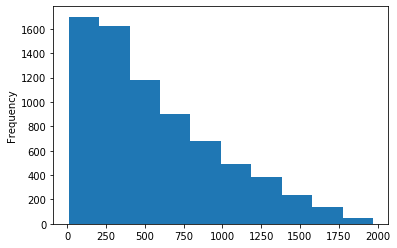

In [5]:
df['Stock Price'].plot.hist()

In [6]:
df.Index.value_counts()

NSE        1498
JSE        1479
S&P 500    1476
NYSE       1468
BSE        1462
Name: Index, dtype: int64

In [7]:
# Checking for missing catogories and different datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [8]:
df.isna().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

It can be seen that the datatypes of all the attributes do not match. Also, there are missing values in the attributes. Now, the dataset is going to be edited.

In [9]:
# Make a copy of original DataFrame to perform edits on
df_temp = df.copy()

## Convert string to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this, pandas types api is used, which allows us to interact and manupulate types of data.

In [10]:
df_temp.head().T

,0,1,2,3,4
Stock Index,AA1,AA2,AA3,AA4,AA5
Index,NYSE,NYSE,NYSE,BSE,S&P 500
Industry,Real Estate,Information Tech,Information Tech,Materials,Real Estate
VWAP,700.29,214.52,943.42,828.13,NaN
General Index,12765.8,12765.8,12765.8,38182.1,3351.28
NAV,32.38,33.25,88.27,73.66,23.79
P/E Ratio,45.35,170.56,143.58,151.76,NaN
Volumes Traded,1.2086e+06,1.37534e+07,6.892e+06,8.31679e+06,3.94331e+06
Inventory Turnover,5.05,3.1,7.7,4.8,8.06
Covid Impact (Beta),-0.43,0.23,0.23,0.03,-0.43


In [11]:
pd.api.types.is_string_dtype(df_temp['Industry'])

True

In [12]:
# These columns contains strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Stock Index
Index
Industry


In [13]:
# This will turn all of the string values into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Stock Index           7383 non-null   category
 1   Index                 7383 non-null   category
 2   Industry              7383 non-null   category
 3   VWAP                  7345 non-null   float64 
 4   General Index         7321 non-null   float64 
 5   NAV                   7322 non-null   float64 
 6   P/E Ratio             7149 non-null   float64 
 7   Volumes Traded        7115 non-null   float64 
 8   Inventory Turnover    6984 non-null   float64 
 9   Covid Impact (Beta)   7007 non-null   float64 
 10  Tracking Error        7312 non-null   float64 
 11  Dollar Exchange Rate  7306 non-null   float64 
 12  Put-Call Ratio        7298 non-null   float64 
 13  P/B Ratio             7358 non-null   float64 
 14  Stock Price           7383 non-null   float64 
dtypes: c

In [15]:
df_temp['Industry'].cat.categories

Index(['Energy', 'Healthcare', 'Information Tech', 'Materials', 'Real Estate'], dtype='object')

In [16]:
df_temp['Industry'].cat.codes

0       4
1       2
2       2
3       3
4       4
       ..
7378    1
7379    2
7380    3
7381    3
7382    2
Length: 7383, dtype: int8

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

In [17]:
df_temp.head().T

,0,1,2,3,4
Stock Index,AA1,AA2,AA3,AA4,AA5
Index,NYSE,NYSE,NYSE,BSE,S&P 500
Industry,Real Estate,Information Tech,Information Tech,Materials,Real Estate
VWAP,700.29,214.52,943.42,828.13,NaN
General Index,12765.8,12765.8,12765.8,38182.1,3351.28
NAV,32.38,33.25,88.27,73.66,23.79
P/E Ratio,45.35,170.56,143.58,151.76,NaN
Volumes Traded,1.2086e+06,1.37534e+07,6.892e+06,8.31679e+06,3.94331e+06
Inventory Turnover,5.05,3.1,7.7,4.8,8.06
Covid Impact (Beta),-0.43,0.23,0.23,0.03,-0.43


In [18]:
df_temp.isna().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

## Fill missing values

 For the machine learning model to work:
 
    1. All of our data has to be numerical
    2. There can't be any missing values
    
And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

## Filling the numerical values first

The missing values in any column is to be filled with median of that column

In [19]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

VWAP
General Index
NAV
P/E Ratio
Volumes Traded
Inventory Turnover
Covid Impact (Beta)
Tracking Error
Dollar Exchange Rate
Put-Call Ratio
P/B Ratio
Stock Price


In [20]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

VWAP
General Index
NAV
P/E Ratio
Volumes Traded
Inventory Turnover
Covid Impact (Beta)
Tracking Error
Dollar Exchange Rate
Put-Call Ratio
P/B Ratio


In [21]:
# Fill numeric rows with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_temp[label] = content.fillna(content.median())

In [22]:
# Check if there's any null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [23]:
df_temp.VWAP_is_missing.value_counts()

False    7345
True       38
Name: VWAP_is_missing, dtype: int64

### Filling and turning categorical variables to numbers

In [24]:
# Check columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Stock Index
Index
Industry


In [25]:
# Turn categorical variables into numbers
for label, content in df_temp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_temp[label] = pd.Categorical(content).codes+1

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Stock Index                      7383 non-null   int16  
 1   Index                            7383 non-null   int8   
 2   Industry                         7383 non-null   int8   
 3   VWAP                             7383 non-null   float64
 4   General Index                    7383 non-null   float64
 5   NAV                              7383 non-null   float64
 6   P/E Ratio                        7383 non-null   float64
 7   Volumes Traded                   7383 non-null   float64
 8   Inventory Turnover               7383 non-null   float64
 9   Covid Impact (Beta)              7383 non-null   float64
 10  Tracking Error                   7383 non-null   float64
 11  Dollar Exchange Rate             7383 non-null   float64
 12  Put-Call Ratio      

In [27]:
df_temp.isna().sum()

Stock Index                        0
Index                              0
Industry                           0
VWAP                               0
General Index                      0
NAV                                0
P/E Ratio                          0
Volumes Traded                     0
Inventory Turnover                 0
Covid Impact (Beta)                0
Tracking Error                     0
Dollar Exchange Rate               0
Put-Call Ratio                     0
P/B Ratio                          0
Stock Price                        0
VWAP_is_missing                    0
General Index_is_missing           0
NAV_is_missing                     0
P/E Ratio_is_missing               0
Volumes Traded_is_missing          0
Inventory Turnover_is_missing      0
Covid Impact (Beta)_is_missing     0
Tracking Error_is_missing          0
Dollar Exchange Rate_is_missing    0
Put-Call Ratio_is_missing          0
P/B Ratio_is_missing               0
Stock Index_is_missing             0
I

In [28]:
df_temp.head().T

,0,1,2,3,4
Stock Index,1,428,539,650,761
Index,4,4,4,1,5
Industry,5,3,3,4,5
VWAP,700.29,214.52,943.42,828.13,488.38
General Index,12765.8,12765.8,12765.8,38182.1,3351.28
NAV,32.38,33.25,88.27,73.66,23.79
P/E Ratio,45.35,170.56,143.58,151.76,105.77
Volumes Traded,1.2086e+06,1.37534e+07,6.892e+06,8.31679e+06,3.94331e+06
Inventory Turnover,5.05,3.1,7.7,4.8,8.06
Covid Impact (Beta),-0.43,0.23,0.23,0.03,-0.43


## 5. Modelling

The dataset has been explored a little.

Following the Scikit-Learn machine learning map, (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), RandomForestRegressor() can be tried at first.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
%%time
# Instantiate model
random_forest_model = RandomForestRegressor(n_jobs=-1)

# Fit the model
random_forest_model.fit(df_temp.drop("Stock Price", axis=1), df_temp['Stock Price'])

Wall time: 2.77 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# Score the model
random_forest_model.score(df_temp.drop("Stock Price", axis=1), df_temp['Stock Price'])

0.9958281395696436

## Splitting data into train and valid sets

It is necessary to split the train dataset into training ang validation set.

The training set is used to train the model and validation set is used to evaluate the model.

For this train_test_split() can be used. 30 percent of train dataset is split as validation set.

In [32]:
df_temp.head().T

,0,1,2,3,4
Stock Index,1,428,539,650,761
Index,4,4,4,1,5
Industry,5,3,3,4,5
VWAP,700.29,214.52,943.42,828.13,488.38
General Index,12765.8,12765.8,12765.8,38182.1,3351.28
NAV,32.38,33.25,88.27,73.66,23.79
P/E Ratio,45.35,170.56,143.58,151.76,105.77
Volumes Traded,1.2086e+06,1.37534e+07,6.892e+06,8.31679e+06,3.94331e+06
Inventory Turnover,5.05,3.1,7.7,4.8,8.06
Covid Impact (Beta),-0.43,0.23,0.23,0.03,-0.43


In [33]:
# Training data without validation split
train = df_temp.drop("Stock Price", axis=1)
target = df_temp['Stock Price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_temp.drop("Stock Price", axis=1), df_temp['Stock Price'])

### Building an evaluation function

In [35]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_val, y_preds):
    return np.sqrt(mean_squared_log_error(y_val, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
    return scores

In [36]:
%%time
# Retrain a model on training data
random_forest_model.fit(X_train, y_train)
show_scores(random_forest_model)

Wall time: 2.73 s


{'Training MAE': 7.049401071663415,
 'Valid MAE': 21.480251395179263,
 'Training RMSLE': 0.07750205453709275,
 'Valid RMSLE': 0.18278013875020063,
 'Training R^2': 0.9961030678055921,
 'Valid R^2': 0.9643288477578907}

In [37]:
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning with RandomizedSearchCV

In [38]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [4400]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter = 200,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 15.4min finished


Wall time: 15min 27s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [39]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_samples': 4400,
 'max_features': 'auto',
 'max_depth': None}

In [40]:
show_scores(rs_model)

{'Training MAE': 16.08629755844832,
 'Valid MAE': 23.068518661986268,
 'Training RMSLE': 0.1305432830730057,
 'Valid RMSLE': 0.1806022418472173,
 'Training R^2': 0.9819735753736019,
 'Valid R^2': 0.9638921868472589}

In [41]:
#Training the model with best params
ideal_model = RandomForestRegressor(n_estimators=50,
                                   min_samples_leaf=3,
                                   min_samples_split=16,
                                   max_samples=4400,
                                   max_features="auto",
                                   max_depth=None,
                                   n_jobs=-1)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=4400, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
show_scores(ideal_model)

{'Training MAE': 14.761013188567096,
 'Valid MAE': 23.037815705833694,
 'Training RMSLE': 0.12321522115776087,
 'Valid RMSLE': 0.18091435817823745,
 'Training R^2': 0.9853042878454128,
 'Valid R^2': 0.9646041106857418}

In [43]:
#Loading test dataset
df_test = pd.read_excel('data/Test_dataset.xlsx')

In [44]:
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


### Preprocessing Test dataset

All the steps done for preprocessing train dataset is to done to preprocess the test dataset

In [45]:
# These columns contains strings
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Stock Index
Index
Industry


In [46]:
# This will turn all of the string values into category values
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [47]:
df_test.isna().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     12
General Index           271
NAV                     275
P/E Ratio               292
Volumes Traded           48
Inventory Turnover       30
Covid Impact (Beta)      31
Tracking Error          126
Dollar Exchange Rate    143
Put-Call Ratio          429
P/B Ratio               138
dtype: int64

In [48]:
# Fill numeric rows with the median which has missing values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_test[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_test[label] = content.fillna(content.median())

In [49]:
# Check if there's any null values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [50]:
# Turn categorical variables into numbers
for label, content in df_test.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_test[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_test[label] = pd.Categorical(content).codes+1

In [51]:
df_test.isna().sum()

Stock Index                        0
Index                              0
Industry                           0
VWAP                               0
General Index                      0
NAV                                0
P/E Ratio                          0
Volumes Traded                     0
Inventory Turnover                 0
Covid Impact (Beta)                0
Tracking Error                     0
Dollar Exchange Rate               0
Put-Call Ratio                     0
P/B Ratio                          0
VWAP_is_missing                    0
General Index_is_missing           0
NAV_is_missing                     0
P/E Ratio_is_missing               0
Volumes Traded_is_missing          0
Inventory Turnover_is_missing      0
Covid Impact (Beta)_is_missing     0
Tracking Error_is_missing          0
Dollar Exchange Rate_is_missing    0
Put-Call Ratio_is_missing          0
P/B Ratio_is_missing               0
Stock Index_is_missing             0
Index_is_missing                   0
I

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Stock Index                      3331 non-null   int16  
 1   Index                            3331 non-null   int8   
 2   Industry                         3331 non-null   int8   
 3   VWAP                             3331 non-null   float64
 4   General Index                    3331 non-null   float64
 5   NAV                              3331 non-null   float64
 6   P/E Ratio                        3331 non-null   float64
 7   Volumes Traded                   3331 non-null   float64
 8   Inventory Turnover               3331 non-null   float64
 9   Covid Impact (Beta)              3331 non-null   float64
 10  Tracking Error                   3331 non-null   float64
 11  Dollar Exchange Rate             3331 non-null   float64
 12  Put-Call Ratio      

In [53]:
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),...,Volumes Traded_is_missing,Inventory Turnover_is_missing,Covid Impact (Beta)_is_missing,Tracking Error_is_missing,Dollar Exchange Rate_is_missing,Put-Call Ratio_is_missing,P/B Ratio_is_missing,Stock Index_is_missing,Index_is_missing,Industry_is_missing
0,1,3,4,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,...,False,False,False,False,False,False,False,False,False,False
1,2,2,1,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,...,False,False,False,False,False,False,False,False,False,False
2,3,5,3,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,...,False,False,False,False,False,False,False,False,False,False
3,4,3,2,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,...,False,False,False,False,False,False,False,False,False,False
4,5,4,4,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,...,False,False,False,False,False,True,False,False,False,False


In [54]:
X_train.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),...,Volumes Traded_is_missing,Inventory Turnover_is_missing,Covid Impact (Beta)_is_missing,Tracking Error_is_missing,Dollar Exchange Rate_is_missing,Put-Call Ratio_is_missing,P/B Ratio_is_missing,Stock Index_is_missing,Index_is_missing,Industry_is_missing
3649,2801,4,1,431.54,12765.84,83.46,105.77,10482380.0,4.31,0.11,...,True,False,False,False,False,False,False,False,False,False
4332,5084,2,5,431.57,55722.00,12.66,83.98,11729099.0,5.73,-0.43,...,False,False,False,False,False,False,False,False,False,False
4204,6896,5,1,536.42,3351.28,57.03,181.53,8351731.0,3.63,0.11,...,False,False,False,False,False,False,False,False,False,False
3641,2792,1,1,631.38,38182.08,42.49,105.77,10482380.0,3.59,0.11,...,True,False,False,False,False,False,False,False,False,False
606,881,2,3,252.08,55722.00,11.18,10.98,8990929.0,8.24,0.23,...,False,False,False,False,False,False,False,False,False,False


## Making predictions on test data

In [55]:
test_preds = ideal_model.predict(df_test)

In [56]:
df_test_new = pd.read_excel('data/Test_dataset.xlsx')

In [57]:
df_preds = pd.DataFrame()
df_preds["Stock Index"] = df_test_new["Stock Index"]
df_preds["Stock Price"] = test_preds
df_preds

,Stock Index,Stock Price
0,AC3235,835.741715
1,AC3236,258.280745
2,AC3237,1563.509756
3,AC3238,872.900682
4,AC3239,271.927921
...,...,...
3326,AD2734,133.918686
3327,AD2735,566.804929
3328,AD2736,519.190253
3329,AD2737,360.977226


In [58]:
#exporting predictions as excel file
df_preds.to_excel("data/stock_market_predictions.xlsx", index=False)

## Feature Importance

Since we've built a model which is able to make predictions, it is good to know what parts of the data led to these predictions.

This is where feature importance comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In [59]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([5.49338920e-04, 3.13200051e-04, 2.12110175e-04, 8.78294723e-04,
       1.37184825e-04, 4.92654054e-01, 4.96860622e-01, 1.17993405e-04,
       9.89450627e-04, 1.26185330e-04, 5.62820341e-04, 4.40341328e-05,
       8.85150354e-04, 7.75639452e-04, 2.10382177e-04, 2.00743138e-04,
       3.93346841e-04, 1.90413560e-03, 1.23075724e-03, 2.49660535e-05,
       4.81268066e-05, 4.81870365e-05, 6.04823363e-04, 2.28452810e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [60]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

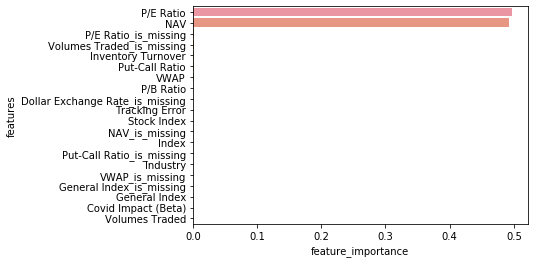

In [61]:
plot_features(X_train.columns, ideal_model.feature_importances_)

From the above graph, it can be observed that NAV(Net asset value) and P/E Ratio(Price-Earning Ratio) has the most impact on the stock price.

In [62]:
sum(ideal_model.feature_importances_)

1.0

In [63]:
df['NAV'].value_counts()

23.93    6
41.51    5
52.26    5
22.63    5
43.93    5
        ..
61.54    1
95.57    1
85.45    1
26.21    1
31.50    1
Name: NAV, Length: 5000, dtype: int64

In [64]:
df['P/E Ratio'].value_counts()

105.47    4
104.06    4
171.64    4
40.89     4
159.71    4
         ..
160.97    1
67.19     1
105.15    1
56.69     1
41.50     1
Name: P/E Ratio, Length: 5950, dtype: int64

## Using Deep learning model for regression

The stock values can also be predicted using sequential model

In [65]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [66]:
NN_model = Sequential()

#Input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim= train.shape[1], activation='relu'))

# Hidden layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

#Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 168,577
Trainable params: 168,577
Non-trainable params: 0
_________________________________________________________________


In [67]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1 , save_best_only = True, mode='auto')
callbacks_list = [checkpoint]

In [68]:
#Training the model 
NN_model.fit(train, target, batch_size=32, validation_split=0.2, callbacks= callbacks_list)


Train on 5906 samples, validate on 1477 samples
Epoch 1/1
5906/5906 [==============================] - 2s 292us/step - loss: 2758.9006 - mean_absolute_error: 2758.9019 - val_loss: 394.7648 - val_mean_absolute_error: 394.7647

Epoch 00001: val_loss improved from inf to 394.76475, saving model to Weights-001--394.76475.hdf5


In [70]:
weights_file = 'Weights-001--394.76475.hdf5'
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [71]:
def show_scores_NN_model(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds)}
    return scores

In [72]:
show_scores_NN_model(NN_model)

{'Training MAE': 395.9829207082479,
 'Valid MAE': 393.16324675097167,
 'Training RMSLE': 1.2550722500256322,
 'Valid RMSLE': 1.2460125013865813}

In [75]:
NN_val_preds = NN_model.predict(X_val)
NN_val_preds

array([[ 62.993248],
       [333.09836 ],
       [211.50815 ],
       ...,
       [298.3087  ],
       [281.04245 ],
       [297.5792  ]], dtype=float32)

In [76]:
ideal_val_preds = ideal_model.predict(X_val)
ideal_val_preds[:10]

array([1435.3373304 ,  327.00451075,  281.86676011,  100.8103773 ,
         74.64346491,  767.38755199,  315.25242496,  482.41914115,
        971.57430583, 1082.77621306])

In [77]:
y_val

1662    1491.806595
4735     314.938147
4434     278.467768
1633      89.743275
2241      60.289871
           ...     
2213      69.737871
6714    1178.078065
5397     676.212123
6522      34.756986
5259     909.140696
Name: Stock Price, Length: 1846, dtype: float64

In [78]:
show_scores(ideal_model)

{'Training MAE': 14.761013188567093,
 'Valid MAE': 23.037815705833697,
 'Training RMSLE': 0.12321522115776087,
 'Valid RMSLE': 0.18091435817823745,
 'Training R^2': 0.9853042878454128,
 'Valid R^2': 0.9646041106857418}

In [79]:
NN_model_preds = NN_model.predict(df_test)

In [80]:
df_NN_model_preds = pd.DataFrame()
df_NN_model_preds["Stock Index"] = df_test_new["Stock Index"]
df_NN_model_preds["Stock Price"] = NN_model_preds
df_NN_model_preds

,Stock Index,Stock Price
0,AC3235,281.264618
1,AC3236,198.130035
2,AC3237,393.954193
3,AC3238,359.750580
4,AC3239,293.394745
...,...,...
3326,AD2734,328.016449
3327,AD2735,272.010223
3328,AD2736,243.745941
3329,AD2737,113.366447


In [81]:
df_preds

,Stock Index,Stock Price
0,AC3235,835.741715
1,AC3236,258.280745
2,AC3237,1563.509756
3,AC3238,872.900682
4,AC3239,271.927921
...,...,...
3326,AD2734,133.918686
3327,AD2735,566.804929
3328,AD2736,519.190253
3329,AD2737,360.977226


**By looking at the performance of both the models on the validation set, RandomForestRegressor model looks better**

So, RandomForestRegressor model is used to fing the predictions of the stock prices on August 10, 2020.

## Problem statement 2

The dataset is loaded

In [110]:
data = pd.read_csv('data/Put-Call_TS.csv', index_col=0, header=0)

In [111]:
data

,10-Aug,11-Aug,12-Aug,13-Aug,14-Aug,15-Aug
Stock Index,,,,,,
AC3235,0.80,0.660,0.77240,0.983224,0.901211,0.898368
AC3236,0.86,0.732,0.85448,1.086645,1.017042,1.029258
AC3237,0.93,0.816,0.95024,1.207302,NaN,1.181962
AC3238,1.09,1.008,1.16912,1.483091,1.461062,1.531000
AC3239,NaN,1.104,1.27856,1.620986,1.615504,1.705519
...,...,...,...,...,...,...
AD2734,0.86,0.732,0.85448,1.086645,1.017042,1.029258
AD2735,0.64,0.468,0.55352,0.707435,0.592327,0.549330
AD2736,0.67,0.504,0.59456,0.759146,0.650243,0.614775


From the dataset, it can be identified as univariate time series problem

## Preprocessing data

In [112]:
# Fill numeric rows with the median
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            data[label] = content.fillna(content.median())

In [113]:
data.isna().sum()

10-Aug    0
11-Aug    0
12-Aug    0
13-Aug    0
14-Aug    0
15-Aug    0
dtype: int64

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, AC3235 to AD2738
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   10-Aug  3331 non-null   float64
 1   11-Aug  3331 non-null   float64
 2   12-Aug  3331 non-null   float64
 3   13-Aug  3331 non-null   float64
 4   14-Aug  3331 non-null   float64
 5   15-Aug  3331 non-null   float64
dtypes: float64(6)
memory usage: 182.2+ KB


## Simple LSTM model for time series prediction

In [126]:
# univariate lstm example
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [127]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [138]:
lst_output=[]
for index, row in data.iterrows(): 
    timeseries_data =list(row)
    n_steps = 3
    X,y = prepare_data(timeseries_data, n_steps)
    n_features = 1
    X =X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=100, verbose=1)
    # demonstrate prediction for next day
    x_input = np.array(row[3:])
    x_input = x_input.reshape((1,n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    lst_output.append(yhat[0][0])


Epoch 1/100
3/3 [==============================] - 2s 655ms/sample - loss: 0.8701
Epoch 2/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8609
Epoch 3/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8523
Epoch 4/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8441
Epoch 5/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8362
Epoch 6/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8287
Epoch 7/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8216
Epoch 8/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8148
Epoch 9/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8083
Epoch 10/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8018
Epoch 11/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7954
Epoch 12/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7889
Epoch 13/100
3/3 [=================

Epoch 3/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0631
Epoch 4/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0505
Epoch 5/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.0387
Epoch 6/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0276
Epoch 7/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0167
Epoch 8/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0062
Epoch 9/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9957
Epoch 10/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9850
Epoch 11/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9742
Epoch 12/100
3/3 [==============================] - 0s 1ms/sample - loss: 0.9633
Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9523
Epoch 14/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9411
Epoch 15/100
3/3 [=================

Epoch 5/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3573
Epoch 6/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3454
Epoch 7/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3344
Epoch 8/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.3241
Epoch 9/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3136
Epoch 10/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3029
Epoch 11/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.2922
Epoch 12/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2814
Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2707
Epoch 14/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2605
Epoch 15/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.2507
Epoch 16/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.2406
Epoch 17/100
3/3 [===============

Epoch 7/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1187
Epoch 8/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0980
Epoch 9/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0771
Epoch 10/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0570
Epoch 11/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0368
Epoch 12/100
3/3 [==============================] - 0s 1ms/sample - loss: 2.0162
Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.9955
Epoch 14/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.9743
Epoch 15/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.9526
Epoch 16/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.9304
Epoch 17/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.9078
Epoch 18/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.8847
Epoch 19/100
3/3 [=============

Epoch 9/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.4205
Epoch 10/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3909
Epoch 11/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3613
Epoch 12/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3318
Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3024
Epoch 14/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.2728
Epoch 15/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.2428
Epoch 16/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.2120
Epoch 17/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1804
Epoch 18/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1477
Epoch 19/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1140
Epoch 20/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0791
Epoch 21/100
3/3 [===========

Epoch 11/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.6341
Epoch 12/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.5999
Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.5649
Epoch 14/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.5291
Epoch 15/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.4926
Epoch 16/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.4551
Epoch 17/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.4164
Epoch 18/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3765
Epoch 19/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.3353
Epoch 20/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.2919
Epoch 21/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.2465
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1988
Epoch 23/100
3/3 [==========

Epoch 13/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.9078
Epoch 14/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.8915
Epoch 15/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.8751
Epoch 16/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.8585
Epoch 17/100
3/3 [==============================] - 0s 1ms/sample - loss: 2.8415
Epoch 18/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.8243
Epoch 19/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.8062
Epoch 20/100
3/3 [==============================] - 0s 1ms/sample - loss: 2.7871
Epoch 21/100
3/3 [==============================] - 0s 1ms/sample - loss: 2.7671
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.7463
Epoch 23/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.7245
Epoch 24/100
3/3 [==============================] - 0s 1ms/sample - loss: 2.7019
Epoch 25/100
3/3 [==========

Epoch 15/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5542
Epoch 16/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5412
Epoch 17/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5279
Epoch 18/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5143
Epoch 19/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.5004
Epoch 20/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4862
Epoch 21/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4715
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4563
Epoch 23/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.4407
Epoch 24/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4245
Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4077
Epoch 26/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.3903
Epoch 27/100
3/3 [==========

Epoch 17/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5016
Epoch 18/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.4853
Epoch 19/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4688
Epoch 20/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4519
Epoch 21/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4344
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4159
Epoch 23/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3964
Epoch 24/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3761
Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3548
Epoch 26/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3327
Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3097
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2858
Epoch 29/100
3/3 [==========

Epoch 19/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.5017
Epoch 20/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4769
Epoch 21/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4511
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4241
Epoch 23/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3960
Epoch 24/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3667
Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3362
Epoch 26/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3043
Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2710
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2362
Epoch 29/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.1999
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1621
Epoch 31/100
3/3 [==========

Epoch 21/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4612
Epoch 22/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4362
Epoch 23/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4103
Epoch 24/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3834
Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3554
Epoch 26/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.3261
Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2955
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2635
Epoch 29/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2301
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1953
Epoch 31/100
3/3 [==============================] - 0s 1ms/sample - loss: 1.1589
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1210
Epoch 33/100
3/3 [==========

Epoch 23/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9271
Epoch 24/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9130
Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8983
Epoch 26/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8830
Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8670
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8503
Epoch 29/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8329
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8148
Epoch 31/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7960
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7764
Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7560
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7349
Epoch 35/100
3/3 [==========

Epoch 25/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3872
Epoch 26/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3770
Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3666
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3557
Epoch 29/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3445
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3329
Epoch 31/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3209
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3084
Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2956
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2824
Epoch 35/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2687
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2546
Epoch 37/100
3/3 [==========

Epoch 27/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1436
Epoch 28/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.1120
Epoch 29/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0791
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0449
Epoch 31/100
3/3 [==============================] - 0s 2ms/sample - loss: 2.0094
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.9725
Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.9341
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.8942
Epoch 35/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.8526
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.8092
Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.7638
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.7164
Epoch 39/100
3/3 [==========

Epoch 29/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4907
Epoch 30/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4553
Epoch 31/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.4182
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3793
Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.3386
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2960
Epoch 35/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2513
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2046
Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1557
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1046
Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0510
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9947
Epoch 41/100
3/3 [==========

Epoch 31/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1655
Epoch 32/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1582
Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1506
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1430
Epoch 35/100
3/3 [==============================] - 0s 1ms/sample - loss: 0.1352
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1272
Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1192
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1111
Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1029
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0947
Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0865
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0783
Epoch 43/100
3/3 [==========

Epoch 33/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2675
Epoch 34/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2575
Epoch 35/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2473
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2367
Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2257
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2145
Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2029
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1910
Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1789
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1664
Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1538
Epoch 44/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1410
Epoch 45/100
3/3 [==========

Epoch 35/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.2351
Epoch 36/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1882
Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1393
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0886
Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0359
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9813
Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9248
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8663
Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8061
Epoch 44/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7442
Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6808
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6161
Epoch 47/100
3/3 [==========

Epoch 37/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2173
Epoch 38/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2115
Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2056
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1995
Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1933
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1868
Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1802
Epoch 44/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.1735
Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1665
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1594
Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1522
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1447
Epoch 49/100
3/3 [==========

Epoch 39/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6263
Epoch 40/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5730
Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5189
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4642
Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4093
Epoch 44/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3546
Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3007
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2484
Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1985
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1519
Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1099
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0736
Epoch 51/100
3/3 [==========

Epoch 41/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8946
Epoch 42/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8179
Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7388
Epoch 44/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6578
Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5755
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4926
Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4103
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3298
Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2531
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1823
Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1203
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0702
Epoch 53/100
3/3 [==========

Epoch 43/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6687
Epoch 44/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6036
Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5373
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4702
Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4029
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3364
Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2716
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2099
Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1529
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1027
Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0613
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0311
Epoch 55/100
3/3 [==========

Epoch 45/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7938
Epoch 46/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7554
Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7154
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6738
Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6303
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5853
Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5388
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4909
Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4419
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3922
Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3422
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2923
Epoch 57/100
3/3 [==========

Epoch 47/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.1321
Epoch 48/100
3/3 [==============================] - 0s 2ms/sample - loss: 1.0473
Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.9600
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.8706
Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.7796
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6876
Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5955
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5046
Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4165
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3331
Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2567
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1900
Epoch 59/100
3/3 [==========

Epoch 49/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.6161
Epoch 50/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.5266
Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.4385
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.3535
Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2739
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2022
Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1416
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0953
Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0667
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0580
Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0693
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0965
Epoch 61/100
3/3 [==========

Epoch 51/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1672
Epoch 52/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1155
Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0754
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0491
Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0383
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0429
Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0607
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0863
Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1126
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1322
Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1406
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1374
Epoch 63/100
3/3 [==========

Epoch 53/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0948
Epoch 54/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1009
Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1062
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1097
Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1107
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1094
Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1062
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1019
Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0974
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0931
Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0895
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0868
Epoch 65/100
3/3 [==========

Epoch 55/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0546
Epoch 56/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0550
Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0599
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0678
Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0763
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0834
Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0872
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0874
Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0844
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0792
Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0730
Epoch 66/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0668
Epoch 67/100
3/3 [==========

Epoch 57/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0183
Epoch 58/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0201
Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0205
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0197
Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0179
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0156
Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0130
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0106
Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0086
Epoch 66/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0071
Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 68/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0055
Epoch 69/100
3/3 [==========

Epoch 59/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0157
Epoch 60/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0110
Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0057
Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0053
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0060
Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0077
Epoch 66/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0099
Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0121
Epoch 68/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0140
Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0152
Epoch 70/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0156
Epoch 71/100
3/3 [==========

Epoch 61/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1063
Epoch 62/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1651
Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2093
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2255
Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.2131
Epoch 66/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1806
Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1390
Epoch 68/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0984
Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0651
Epoch 70/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0421
Epoch 71/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0295
Epoch 72/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0257
Epoch 73/100
3/3 [==========

Epoch 63/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0533
Epoch 64/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0364
Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0246
Epoch 66/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0179
Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0156
Epoch 68/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0165
Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0195
Epoch 70/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0235
Epoch 71/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0276
Epoch 72/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0312
Epoch 73/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0338
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0353
Epoch 75/100
3/3 [==========

Epoch 65/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0116
Epoch 66/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0109
Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0120
Epoch 68/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0141
Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0166
Epoch 70/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0191
Epoch 71/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0212
Epoch 72/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0227
Epoch 73/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0235
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0234
Epoch 75/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0228
Epoch 76/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0215
Epoch 77/100
3/3 [==========

Epoch 67/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.1159
Epoch 68/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0815
Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0546
Epoch 70/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0371
Epoch 71/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0284
Epoch 72/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0268
Epoch 73/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0302
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0364
Epoch 75/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0436
Epoch 76/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0502
Epoch 77/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0555
Epoch 78/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0587
Epoch 79/100
3/3 [==========

Epoch 69/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0059
Epoch 70/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0064
Epoch 71/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0068
Epoch 72/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0071
Epoch 73/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0073
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0074
Epoch 75/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0074
Epoch 76/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0072
Epoch 77/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0070
Epoch 78/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0067
Epoch 79/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0064
Epoch 80/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 81/100
3/3 [==========

Epoch 71/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0209
Epoch 72/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0252
Epoch 73/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0295
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0333
Epoch 75/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0360
Epoch 76/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0375
Epoch 77/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0376
Epoch 78/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0365
Epoch 79/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0344
Epoch 80/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0316
Epoch 81/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0285
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0252
Epoch 83/100
3/3 [==========

Epoch 73/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0414
Epoch 74/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0410
Epoch 75/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0392
Epoch 76/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0363
Epoch 77/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0328
Epoch 78/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0289
Epoch 79/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0251
Epoch 80/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0217
Epoch 81/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0190
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0172
Epoch 83/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0162
Epoch 84/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0160
Epoch 85/100
3/3 [==========

Epoch 75/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0398
Epoch 76/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0408
Epoch 77/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0404
Epoch 78/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0389
Epoch 79/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0366
Epoch 80/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0336
Epoch 81/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0304
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0272
Epoch 83/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0243
Epoch 84/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0219
Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0202
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0191
Epoch 87/100
3/3 [==========

Epoch 77/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0079
Epoch 78/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0088
Epoch 79/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0096
Epoch 80/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0103
Epoch 81/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0107
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0109
Epoch 83/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0108
Epoch 84/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0106
Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0101
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0096
Epoch 87/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0089
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0083
Epoch 89/100
3/3 [==========

Epoch 79/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0241
Epoch 80/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0241
Epoch 81/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0233
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0218
Epoch 83/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0200
Epoch 84/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0179
Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0158
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0138
Epoch 87/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0122
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0109
Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0100
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0096
Epoch 91/100
3/3 [==========

Epoch 81/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0030
Epoch 82/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 83/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 84/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0044
Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0046
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0047
Epoch 87/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0047
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0046
Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0036
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0033
Epoch 93/100
3/3 [==========

Epoch 83/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 84/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0029
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 87/100
3/3 [==============================] - 0s 2ms/sample - loss: 0.0026
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0024
Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0023
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0021
Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0021
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0020
Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0020
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0020
Epoch 95/100
3/3 [==========

Epoch 85/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0346
Epoch 86/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0320
Epoch 87/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0295
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0273
Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0256
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0245
Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0239
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0238
Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0240
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0245
Epoch 95/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0251
Epoch 96/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0256
Epoch 97/100
3/3 [==========

Epoch 87/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0198
Epoch 88/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0206
Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0214
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0219
Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0221
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0219
Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0215
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0209
Epoch 95/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0202
Epoch 96/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0195
Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0189
Epoch 98/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0184
Epoch 99/100
3/3 [==========

Epoch 89/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0082
Epoch 90/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0075
Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0070
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0067
Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0066
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0066
Epoch 95/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0068
Epoch 96/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0070
Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0072
Epoch 98/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0074
Epoch 99/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0076
Epoch 100/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0076
Epoch 1/100
3/3 [==========

Epoch 91/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0051
Epoch 92/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 95/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 96/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0051
Epoch 98/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0051
Epoch 99/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0052
Epoch 100/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0052
Epoch 1/100
3/3 [==============================] - 10s 3s/sample - loss: 1.0656
Epoch 2/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.0536
Epoch 3/100
3/3 [============

Epoch 93/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0112
Epoch 94/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0106
Epoch 95/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0098
Epoch 96/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0091
Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0084
Epoch 98/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 99/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0072
Epoch 100/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0069
Epoch 1/100
3/3 [==============================] - 11s 4s/sample - loss: 2.1528
Epoch 2/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.1296
Epoch 3/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.1072
Epoch 4/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.0865
Epoch 5/100
3/3 [==============

Epoch 95/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0126
Epoch 96/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0132
Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0135
Epoch 98/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0136
Epoch 99/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0135
Epoch 100/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0132
Epoch 1/100
3/3 [==============================] - 11s 4s/sample - loss: 1.9494
Epoch 2/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.9202
Epoch 3/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.8911
Epoch 4/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8631
Epoch 5/100
3/3 [==============================] - 0s 3ms/sample - loss: 1.8369
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8123
Epoch 7/100
3/3 [================

Epoch 97/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0115
Epoch 98/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0116
Epoch 99/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0117
Epoch 100/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.0118
Epoch 1/100
3/3 [==============================] - 13s 4s/sample - loss: 2.6955
Epoch 2/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.6745
Epoch 3/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.6553
Epoch 4/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.6388
Epoch 5/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.6235
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.6096
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.5966
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.5839
Epoch 9/100
3/3 [==================

Epoch 99/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0310
Epoch 100/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0276
Epoch 1/100
3/3 [==============================] - 13s 4s/sample - loss: 3.2289
Epoch 2/100
3/3 [==============================] - 0s 5ms/sample - loss: 3.2062
Epoch 3/100
3/3 [==============================] - 0s 5ms/sample - loss: 3.1850
Epoch 4/100
3/3 [==============================] - 0s 5ms/sample - loss: 3.1640
Epoch 5/100
3/3 [==============================] - 0s 4ms/sample - loss: 3.1442
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 3.1257
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 3.1067
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 3.0872
Epoch 9/100
3/3 [==============================] - 0s 5ms/sample - loss: 3.0674
Epoch 10/100
3/3 [==============================] - 0s 4ms/sample - loss: 3.0473
Epoch 11/100
3/3 [==================

Epoch 1/100
3/3 [==============================] - 16s 5s/sample - loss: 0.9962
Epoch 2/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9883
Epoch 3/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9806
Epoch 4/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9730
Epoch 5/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9653
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9577
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9502
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9426
Epoch 9/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.9349
Epoch 10/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9272
Epoch 11/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9195
Epoch 12/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9117
Epoch 13/100
3/3 [===================

Epoch 3/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.9791
Epoch 4/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.9606
Epoch 5/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.9419
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.9231
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.9036
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8832
Epoch 9/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8619
Epoch 10/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8402
Epoch 11/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.8181
Epoch 12/100
3/3 [==============================] - 0s 19ms/sample - loss: 1.7958
Epoch 13/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.7734
Epoch 14/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.7506
Epoch 15/100
3/3 [================

Epoch 5/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.6732
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6643
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6552
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6461
Epoch 9/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6369
Epoch 10/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6278
Epoch 11/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6187
Epoch 12/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6097
Epoch 13/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6006
Epoch 14/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5913
Epoch 15/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5817
Epoch 16/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5720
Epoch 17/100
3/3 [===============

Epoch 7/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2794
Epoch 8/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2737
Epoch 9/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.2680
Epoch 10/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2624
Epoch 11/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.2569
Epoch 12/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2513
Epoch 13/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2457
Epoch 14/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2399
Epoch 15/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2342
Epoch 16/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.2283
Epoch 17/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.2223
Epoch 18/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2162
Epoch 19/100
3/3 [=============

Epoch 9/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.4240
Epoch 10/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.4032
Epoch 11/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.3819
Epoch 12/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.3601
Epoch 13/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.3376
Epoch 14/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.3145
Epoch 15/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.2909
Epoch 16/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.2666
Epoch 17/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.2415
Epoch 18/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.2153
Epoch 19/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.1880
Epoch 20/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.1596
Epoch 21/100
3/3 [===========

Epoch 11/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.5295
Epoch 12/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.5041
Epoch 13/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.4784
Epoch 14/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.4520
Epoch 15/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.4249
Epoch 16/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.3970
Epoch 17/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.3682
Epoch 18/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.3384
Epoch 19/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.3079
Epoch 20/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.2764
Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 2.2439
Epoch 22/100
3/3 [==============================] - 0s 4ms/sample - loss: 2.2101
Epoch 23/100
3/3 [==========

Epoch 13/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.7070
Epoch 14/100
3/3 [==============================] - 0s 3ms/sample - loss: 0.6926
Epoch 15/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6780
Epoch 16/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6632
Epoch 17/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6482
Epoch 18/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6330
Epoch 19/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6175
Epoch 20/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.6017
Epoch 21/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5854
Epoch 22/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5686
Epoch 23/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5513
Epoch 24/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.5335
Epoch 25/100
3/3 [==========

Epoch 15/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.0290
Epoch 16/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.0124
Epoch 17/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9953
Epoch 18/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9776
Epoch 19/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9594
Epoch 20/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.9407
Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9214
Epoch 22/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9017
Epoch 23/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.8814
Epoch 24/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.8603
Epoch 25/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.8385
Epoch 26/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.8159
Epoch 27/100
3/3 [==========

Epoch 17/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.3781
Epoch 18/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3694
Epoch 19/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3605
Epoch 20/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3513
Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3420
Epoch 22/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3323
Epoch 23/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.3225
Epoch 24/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3124
Epoch 25/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3020
Epoch 26/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2913
Epoch 27/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2804
Epoch 28/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2692
Epoch 29/100
3/3 [==========

Epoch 19/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.7168
Epoch 20/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.6984
Epoch 21/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.6796
Epoch 22/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.6601
Epoch 23/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.6398
Epoch 24/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.6186
Epoch 25/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.5965
Epoch 26/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.5734
Epoch 27/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.5494
Epoch 28/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.5243
Epoch 29/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.4981
Epoch 30/100
3/3 [==============================] - 0s 4ms/sample - loss: 1.4707
Epoch 31/100
3/3 [==========

Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.9245
Epoch 22/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.9063
Epoch 23/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.8873
Epoch 24/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.8674
Epoch 25/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.8466
Epoch 26/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.8249
Epoch 27/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.8022
Epoch 28/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7784
Epoch 29/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7536
Epoch 30/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7276
Epoch 31/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.7005
Epoch 32/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.6721
Epoch 33/100
3/3 [==========

Epoch 23/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.9116
Epoch 24/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.8731
Epoch 25/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.8327
Epoch 26/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.7901
Epoch 27/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.7451
Epoch 28/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.6977
Epoch 29/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.6477
Epoch 30/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.5947
Epoch 31/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.5388
Epoch 32/100
3/3 [==============================] - 0s 5ms/sample - loss: 1.4796
Epoch 33/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.4165
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 1.3499
Epoch 35/100
3/3 [==========

Epoch 25/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4673
Epoch 26/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4568
Epoch 27/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4458
Epoch 28/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.4345
Epoch 29/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4228
Epoch 30/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4107
Epoch 31/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3982
Epoch 32/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3852
Epoch 33/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3718
Epoch 34/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3579
Epoch 35/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3435
Epoch 36/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.3286
Epoch 37/100
3/3 [==========

Epoch 27/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5953
Epoch 28/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5836
Epoch 29/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.5716
Epoch 30/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5592
Epoch 31/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5463
Epoch 32/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5328
Epoch 33/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5188
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5044
Epoch 35/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4894
Epoch 36/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4739
Epoch 37/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4577
Epoch 38/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4410
Epoch 39/100
3/3 [==========

Epoch 29/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.5264
Epoch 30/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.5101
Epoch 31/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4930
Epoch 32/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4752
Epoch 33/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4568
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4377
Epoch 35/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4179
Epoch 36/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3974
Epoch 37/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3763
Epoch 38/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3545
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3320
Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3089
Epoch 41/100
3/3 [==========

Epoch 31/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1565
Epoch 32/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1497
Epoch 33/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1428
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1358
Epoch 35/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1287
Epoch 36/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1215
Epoch 37/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.1142
Epoch 38/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1068
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0994
Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0919
Epoch 41/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0844
Epoch 42/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0769
Epoch 43/100
3/3 [==========

3/3 [==============================] - 0s 4ms/sample - loss: 0.4609
Epoch 33/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4395
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4174
Epoch 35/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3946
Epoch 36/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3712
Epoch 37/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3472
Epoch 38/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3227
Epoch 39/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2977
Epoch 40/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2722
Epoch 41/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2465
Epoch 42/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.2207
Epoch 43/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1948
Epoch 44/100
3/3 [=======================

Epoch 34/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4208
Epoch 35/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.4026
Epoch 36/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.3839
Epoch 37/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3647
Epoch 38/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3450
Epoch 39/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.3248
Epoch 40/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.3041
Epoch 41/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2830
Epoch 42/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2616
Epoch 43/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2398
Epoch 44/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2179
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1959
Epoch 46/100
3/3 [==========

Epoch 36/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3812
Epoch 37/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3672
Epoch 38/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.3525
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3372
Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3211
Epoch 41/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3043
Epoch 42/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2868
Epoch 43/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2686
Epoch 44/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2498
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2305
Epoch 46/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2105
Epoch 47/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.1900
Epoch 48/100
3/3 [==========

Epoch 38/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.1338
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1141
Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0950
Epoch 41/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0769
Epoch 42/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0600
Epoch 43/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0447
Epoch 44/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0315
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0207
Epoch 46/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0126
Epoch 47/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0075
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0055
Epoch 49/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0065
Epoch 50/100
3/3 [==========

Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.8771
Epoch 41/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.8487
Epoch 42/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.8185
Epoch 43/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7865
Epoch 44/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7527
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7174
Epoch 46/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.6804
Epoch 47/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.6417
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.6015
Epoch 49/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5597
Epoch 50/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.5164
Epoch 51/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4718
Epoch 52/100
3/3 [==========

Epoch 42/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.6338
Epoch 43/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.5200
Epoch 44/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.4094
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.3050
Epoch 46/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2106
Epoch 47/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1305
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0700
Epoch 49/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0341
Epoch 50/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0266
Epoch 51/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0475
Epoch 52/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0895
Epoch 53/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.1378
Epoch 54/100
3/3 [==========

Epoch 44/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7932
Epoch 45/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.7167
Epoch 46/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6401
Epoch 47/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.5643
Epoch 48/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4907
Epoch 49/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4206
Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.3559
Epoch 51/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2988
Epoch 52/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.2516
Epoch 53/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2170
Epoch 54/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1969
Epoch 55/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1927
Epoch 56/100
3/3 [==========

Epoch 46/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.5116
Epoch 47/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4430
Epoch 48/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.3787
Epoch 49/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.3206
Epoch 50/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.2707
Epoch 51/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2311
Epoch 52/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.2039
Epoch 53/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.1905
Epoch 54/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1913
Epoch 55/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2046
Epoch 56/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.2262
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.2497
Epoch 58/100
3/3 [=========

Epoch 48/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1503
Epoch 49/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1402
Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1299
Epoch 51/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1195
Epoch 52/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.1090
Epoch 53/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0985
Epoch 54/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0881
Epoch 55/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0779
Epoch 56/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0679
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0582
Epoch 58/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0491
Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0404
Epoch 60/100
3/3 [==========

Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1406
Epoch 51/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0939
Epoch 52/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0564
Epoch 53/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0299
Epoch 54/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0161
Epoch 55/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0153
Epoch 56/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0265
Epoch 57/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0460
Epoch 58/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0680
Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0863
Epoch 60/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0965
Epoch 61/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0972
Epoch 62/100
3/3 [==========

Epoch 52/100
3/3 [==============================] - 0s 13ms/sample - loss: 0.1404
Epoch 53/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.0983
Epoch 54/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0629
Epoch 55/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0358
Epoch 56/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0180
Epoch 57/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0105
Epoch 58/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0129
Epoch 59/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0239
Epoch 60/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0402
Epoch 61/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0574
Epoch 62/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0711
Epoch 63/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0784
Epoch 64/100
3/3 [=======

3/3 [==============================] - 0s 8ms/sample - loss: 0.0334
Epoch 54/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0199
Epoch 55/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0250
Epoch 56/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0461
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0766
Epoch 58/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1071
Epoch 59/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.1288
Epoch 60/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1365
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1302
Epoch 62/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1135
Epoch 63/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0914
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0686
Epoch 65/100
3/3 [=======================

Epoch 55/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0058
Epoch 56/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0065
Epoch 57/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0091
Epoch 58/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0128
Epoch 59/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0168
Epoch 60/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0203
Epoch 61/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0227
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0236
Epoch 63/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0231
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0214
Epoch 65/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0188
Epoch 66/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0159
Epoch 67/100
3/3 [=========

Epoch 57/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0197
Epoch 58/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0293
Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0383
Epoch 60/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0449
Epoch 61/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0478
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0470
Epoch 63/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0430
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0370
Epoch 65/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0300
Epoch 66/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0232
Epoch 67/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0173
Epoch 68/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0127
Epoch 69/100
3/3 [==========

Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0728
Epoch 60/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0600
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0460
Epoch 62/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0333
Epoch 63/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0231
Epoch 64/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0162
Epoch 65/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0123
Epoch 66/100
3/3 [==============================] - 0s 5ms/sample - loss: 0.0112
Epoch 67/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0121
Epoch 68/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0142
Epoch 69/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0168
Epoch 70/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0194
Epoch 71/100
3/3 [==========

Epoch 61/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0379
Epoch 62/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0454
Epoch 63/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0493
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0490
Epoch 65/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0452
Epoch 66/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0391
Epoch 67/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0319
Epoch 68/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0248
Epoch 69/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0186
Epoch 70/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0139
Epoch 71/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0106
Epoch 72/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0089
Epoch 73/100
3/3 [==========

3/3 [==============================] - 0s 10ms/sample - loss: 0.0264
Epoch 63/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0186
Epoch 64/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0125
Epoch 65/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0084
Epoch 66/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0062
Epoch 67/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0060
Epoch 68/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0074
Epoch 69/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0099
Epoch 70/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0131
Epoch 71/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0162
Epoch 72/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0186
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0199
Epoch 74/100
3/3 [====================

Epoch 64/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0527
Epoch 65/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0844
Epoch 66/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1113
Epoch 67/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.1253
Epoch 68/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.1242
Epoch 69/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1104
Epoch 70/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0893
Epoch 71/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0665
Epoch 72/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0459
Epoch 73/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0300
Epoch 74/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0197
Epoch 75/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0148
Epoch 76/100
3/3 [==========

Epoch 65/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.0393
Epoch 66/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0279
Epoch 67/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0194
Epoch 68/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0140
Epoch 69/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0115
Epoch 70/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0112
Epoch 71/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0126
Epoch 72/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0148
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0173
Epoch 74/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0197
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0216
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0228
Epoch 77/100
3/3 [=========

Epoch 66/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0847
Epoch 67/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0937
Epoch 68/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0916
Epoch 69/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0807
Epoch 70/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0650
Epoch 71/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0485
Epoch 72/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0339
Epoch 73/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0230
Epoch 74/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0161
Epoch 75/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0129
Epoch 76/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0127
Epoch 77/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0144
Epoch 78/100
3/3 [=====

Epoch 67/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0305
Epoch 68/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0223
Epoch 69/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0160
Epoch 70/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0119
Epoch 71/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0098
Epoch 72/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0092
Epoch 73/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0099
Epoch 74/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0112
Epoch 75/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0129
Epoch 76/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0146
Epoch 77/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0161
Epoch 78/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0171
Epoch 79/100
3/3 [======

Epoch 69/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1472
Epoch 70/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1443
Epoch 71/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.1416
Epoch 72/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1393
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1376
Epoch 74/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1363
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1355
Epoch 76/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.1350
Epoch 77/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1348
Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1348
Epoch 79/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1348
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.1348
Epoch 81/100
3/3 [==========

3/3 [==============================] - 0s 12ms/sample - loss: 0.0490
Epoch 71/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0345
Epoch 72/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.0226
Epoch 73/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0143
Epoch 74/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0094
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0076
Epoch 76/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0081
Epoch 77/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0101
Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0128
Epoch 79/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0156
Epoch 80/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0181
Epoch 81/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0200
Epoch 82/100
3/3 [=====================

3/3 [==============================] - 0s 7ms/sample - loss: 0.0087
Epoch 72/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0071
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0062
Epoch 74/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0059
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0060
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0064
Epoch 77/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0070
Epoch 78/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0076
Epoch 79/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0081
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0086
Epoch 81/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0089
Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0090
Epoch 83/100
3/3 [=======================

Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0328
Epoch 74/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0307
Epoch 75/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0280
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0250
Epoch 77/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0220
Epoch 78/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0192
Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0169
Epoch 80/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0151
Epoch 81/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0140
Epoch 82/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0136
Epoch 83/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0137
Epoch 84/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0142
Epoch 85/100
3/3 [==========

Epoch 75/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0094
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0102
Epoch 77/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0108
Epoch 78/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0110
Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0109
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0105
Epoch 81/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0099
Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0092
Epoch 83/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0084
Epoch 84/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0076
Epoch 85/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0069
Epoch 86/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0063
Epoch 87/100
3/3 [==========

Epoch 77/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0076
Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0074
Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0072
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0069
Epoch 81/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0066
Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0064
Epoch 83/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0061
Epoch 84/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0060
Epoch 85/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0058
Epoch 86/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0058
Epoch 87/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0057
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0057
Epoch 89/100
3/3 [==========

Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0064
Epoch 79/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0062
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0061
Epoch 81/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0060
Epoch 82/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0059
Epoch 83/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0059
Epoch 84/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0059
Epoch 85/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0059
Epoch 86/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0060
Epoch 87/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0060
Epoch 88/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0060
Epoch 89/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0061
Epoch 90/100
3/3 [=========

Epoch 80/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0323
Epoch 81/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0292
Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0269
Epoch 83/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0256
Epoch 84/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0252
Epoch 85/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0255
Epoch 86/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0263
Epoch 87/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0274
Epoch 88/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0284
Epoch 89/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0291
Epoch 90/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0294
Epoch 91/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0293
Epoch 92/100
3/3 [==========

Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0100
Epoch 83/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0093
Epoch 84/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0088
Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0085
Epoch 86/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0085
Epoch 87/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0085
Epoch 88/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0087
Epoch 89/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0089
Epoch 90/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0092
Epoch 91/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0093
Epoch 92/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0095
Epoch 93/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0095
Epoch 94/100
3/3 [==========

Epoch 84/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0090
Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0093
Epoch 86/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0098
Epoch 87/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0103
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0109
Epoch 89/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0112
Epoch 90/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0114
Epoch 91/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0113
Epoch 92/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0111
Epoch 93/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0107
Epoch 94/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0102
Epoch 95/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0098
Epoch 96/100
3/3 [==========

Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0118
Epoch 86/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0108
Epoch 87/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0102
Epoch 88/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0101
Epoch 89/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0104
Epoch 90/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0109
Epoch 91/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0115
Epoch 92/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0120
Epoch 93/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0124
Epoch 94/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0126
Epoch 95/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0125
Epoch 96/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0123
Epoch 97/100
3/3 [===

3/3 [==============================] - 0s 9ms/sample - loss: 0.0165
Epoch 87/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0166
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0165
Epoch 89/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0161
Epoch 90/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0156
Epoch 91/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0150
Epoch 92/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0144
Epoch 93/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0139
Epoch 94/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0135
Epoch 95/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0133
Epoch 96/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0132
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0132
Epoch 98/100
3/3 [======================

Epoch 87/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0125
Epoch 88/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0115
Epoch 89/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0105
Epoch 90/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0095
Epoch 91/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0085
Epoch 92/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0076
Epoch 93/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0070
Epoch 94/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0065
Epoch 95/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0063
Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0063
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0064
Epoch 98/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0066
Epoch 99/100
3/3 [=====

Epoch 89/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0145
Epoch 90/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0151
Epoch 91/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0157
Epoch 92/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0159
Epoch 93/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0160
Epoch 94/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0157
Epoch 95/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0153
Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0148
Epoch 97/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0142
Epoch 98/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.0137
Epoch 99/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0132
Epoch 100/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0129
Epoch 1/100
3/3 [==========

3/3 [==============================] - 0s 8ms/sample - loss: 0.0216
Epoch 91/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0230
Epoch 92/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0236
Epoch 93/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0235
Epoch 94/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0227
Epoch 95/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0214
Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0197
Epoch 97/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0179
Epoch 98/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0161
Epoch 99/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0145
Epoch 100/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0132
Epoch 1/100
3/3 [==============================] - 33s 11s/sample - loss: 0.9230
Epoch 2/100
3/3 [=======================

Epoch 91/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0076
Epoch 92/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0076
Epoch 93/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0075
Epoch 94/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0073
Epoch 95/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0072
Epoch 96/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0070
Epoch 97/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0068
Epoch 98/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0067
Epoch 99/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0066
Epoch 100/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0065
Epoch 1/100
3/3 [==============================] - 32s 11s/sample - loss: 1.3419
Epoch 2/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.3248
Epoch 3/100
3/3 [====

Epoch 93/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0059
Epoch 94/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0061
Epoch 95/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0063
Epoch 96/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0064
Epoch 97/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0064
Epoch 98/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0064
Epoch 99/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0064
Epoch 100/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0063
Epoch 1/100
3/3 [==============================] - 32s 11s/sample - loss: 3.3620
Epoch 2/100
3/3 [==============================] - 0s 12ms/sample - loss: 3.3273
Epoch 3/100
3/3 [==============================] - 0s 7ms/sample - loss: 3.2924
Epoch 4/100
3/3 [==============================] - 0s 8ms/sample - loss: 3.2577
Epoch 5/100
3/3 [===========

Epoch 95/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0259
Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0248
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0240
Epoch 98/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0235
Epoch 99/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0233
Epoch 100/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0233
Epoch 1/100
3/3 [==============================] - 32s 11s/sample - loss: 0.9485
Epoch 2/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.9380
Epoch 3/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.9282
Epoch 4/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.9183
Epoch 5/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.9082
Epoch 6/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.8982
Epoch 7/100
3/3 [==============

Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0070
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0071
Epoch 98/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0071
Epoch 99/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0071
Epoch 100/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.0070
Epoch 1/100
3/3 [==============================] - 32s 11s/sample - loss: 0.5196
Epoch 2/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.5112
Epoch 3/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.5032
Epoch 4/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.4952
Epoch 5/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.4876
Epoch 6/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.4800
Epoch 7/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.4724
Epoch 8/100
3/3 [===============

Epoch 98/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0055
Epoch 99/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.0055
Epoch 100/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.0054
Epoch 1/100
3/3 [==============================] - 33s 11s/sample - loss: 0.6484
Epoch 2/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.6413
Epoch 3/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6347
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6284
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6223
Epoch 6/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6165
Epoch 7/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6105
Epoch 8/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.6045
Epoch 9/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.5984
Epoch 10/100
3/3 [===========

Epoch 99/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0054
Epoch 100/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0054
Epoch 1/100
3/3 [==============================] - 39s 13s/sample - loss: 0.9493
Epoch 2/100
3/3 [==============================] - 0s 13ms/sample - loss: 0.9359
Epoch 3/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.9222
Epoch 4/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.9087
Epoch 5/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.8959
Epoch 6/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.8840
Epoch 7/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.8719
Epoch 8/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8596
Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8472
Epoch 10/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.8351
Epoch 11/100
3/3 [=========

Epoch 100/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.0063
Epoch 1/100
3/3 [==============================] - 34s 11s/sample - loss: 2.8755
Epoch 2/100
3/3 [==============================] - 0s 32ms/sample - loss: 2.8506
Epoch 3/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.8269
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.8038
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7806
Epoch 6/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7571
Epoch 7/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7334
Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7096
Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.6859
Epoch 10/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.6622
Epoch 11/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.6385
Epoch 12/100
3/3 [======

Epoch 1/100
3/3 [==============================] - 34s 11s/sample - loss: 2.2344
Epoch 2/100
3/3 [==============================] - 0s 15ms/sample - loss: 2.2113
Epoch 3/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.1900
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.1704
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.1511
Epoch 6/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.1308
Epoch 7/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.1095
Epoch 8/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.0877
Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.0657
Epoch 10/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.0433
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.0207
Epoch 12/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.9979
Epoch 13/100
3/3 [=======

Epoch 2/100
3/3 [==============================] - 0s 13ms/sample - loss: 2.8171
Epoch 3/100
3/3 [==============================] - 0s 23ms/sample - loss: 2.7893
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7622
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7354
Epoch 6/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.7091
Epoch 7/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.6845
Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.6613
Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.6382
Epoch 10/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.6167
Epoch 11/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.5964
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.5763
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.5556
Epoch 14/100
3/3 [======

Epoch 3/100
3/3 [==============================] - 0s 24ms/sample - loss: 1.1402
Epoch 4/100
3/3 [==============================] - 0s 20ms/sample - loss: 1.1282
Epoch 5/100
3/3 [==============================] - 0s 22ms/sample - loss: 1.1166
Epoch 6/100
3/3 [==============================] - 0s 22ms/sample - loss: 1.1057
Epoch 7/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.0954
Epoch 8/100
3/3 [==============================] - 0s 8ms/sample - loss: 1.0853
Epoch 9/100
3/3 [==============================] - 0s 21ms/sample - loss: 1.0753
Epoch 10/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.0651
Epoch 11/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.0548
Epoch 12/100
3/3 [==============================] - 0s 19ms/sample - loss: 1.0443
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.0338
Epoch 14/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.0231
Epoch 15/100
3/3 [=========

Epoch 4/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.8216
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.8024
Epoch 6/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.7851
Epoch 7/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.7689
Epoch 8/100
3/3 [==============================] - 0s 14ms/sample - loss: 1.7531
Epoch 9/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.7371
Epoch 10/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.7210
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.7044
Epoch 12/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.6874
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.6699
Epoch 14/100
3/3 [==============================] - 0s 14ms/sample - loss: 1.6520
Epoch 15/100
3/3 [==============================] - 0s 8ms/sample - loss: 1.6337
Epoch 16/100
3/3 [=======

Epoch 5/100
3/3 [==============================] - 0s 16ms/sample - loss: 0.7207
Epoch 6/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.7117
Epoch 7/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.7031
Epoch 8/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.6947
Epoch 9/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6863
Epoch 10/100
3/3 [==============================] - 0s 9ms/sample - loss: 0.6777
Epoch 11/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6691
Epoch 12/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.6604
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6515
Epoch 14/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6424
Epoch 15/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6330
Epoch 16/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.6233
Epoch 17/100
3/3 [======

Epoch 6/100
3/3 [==============================] - 0s 16ms/sample - loss: 1.3703
Epoch 7/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.3592
Epoch 8/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.3486
Epoch 9/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.3380
Epoch 10/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.3271
Epoch 11/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.3158
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.3043
Epoch 13/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.2926
Epoch 14/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.2806
Epoch 15/100
3/3 [==============================] - 0s 8ms/sample - loss: 1.2682
Epoch 16/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.2555
Epoch 17/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.2423
Epoch 18/100
3/3 [===

Epoch 7/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.9432
Epoch 8/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.9314
Epoch 9/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.9194
Epoch 10/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.9072
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8946
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8815
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.8680
Epoch 14/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8542
Epoch 15/100
3/3 [==============================] - 0s 13ms/sample - loss: 0.8399
Epoch 16/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8251
Epoch 17/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.8097
Epoch 18/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.7938
Epoch 19/100
3/3 [=

Epoch 8/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.3478
Epoch 9/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.3422
Epoch 10/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.3371
Epoch 11/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.3320
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.3269
Epoch 13/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.3217
Epoch 14/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.3165
Epoch 15/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.3112
Epoch 16/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.3058
Epoch 17/100
3/3 [==============================] - 0s 24ms/sample - loss: 0.3004
Epoch 18/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.2949
Epoch 19/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.2893
Epoch 20/100
3/3 [=

Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.1970
Epoch 10/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.1845
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.1717
Epoch 12/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.1588
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.1457
Epoch 14/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.1324
Epoch 15/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.1191
Epoch 16/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.1057
Epoch 17/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.0923
Epoch 18/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.0785
Epoch 19/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.0643
Epoch 20/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.0496
Epoch 21/100
3/3 

Epoch 10/100
3/3 [==============================] - 0s 13ms/sample - loss: 1.4728
Epoch 11/100
3/3 [==============================] - 0s 13ms/sample - loss: 1.4541
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.4359
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.4180
Epoch 14/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.4000
Epoch 15/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.3817
Epoch 16/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.3632
Epoch 17/100
3/3 [==============================] - 0s 13ms/sample - loss: 1.3443
Epoch 18/100
3/3 [==============================] - 0s 13ms/sample - loss: 1.3250
Epoch 19/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.3053
Epoch 20/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.2851
Epoch 21/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.2645
Epoch 22/100
3/3

Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.9251
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.9144
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.9036
Epoch 14/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8926
Epoch 15/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8812
Epoch 16/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8696
Epoch 17/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.8577
Epoch 18/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8455
Epoch 19/100
3/3 [==============================] - 0s 13ms/sample - loss: 0.8330
Epoch 20/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.8201
Epoch 21/100
3/3 [==============================] - 0s 8ms/sample - loss: 0.8068
Epoch 22/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.7931
Epoch 23/100
3/3 

Epoch 11/100
3/3 [==============================] - 0s 9ms/sample - loss: 2.4240
Epoch 12/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.3961
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.3680
Epoch 14/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.3395
Epoch 15/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.3107
Epoch 16/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.2814
Epoch 17/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.2518
Epoch 18/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.2213
Epoch 19/100
3/3 [==============================] - 0s 8ms/sample - loss: 2.1899
Epoch 20/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.1573
Epoch 21/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.1234
Epoch 22/100
3/3 [==============================] - 0s 21ms/sample - loss: 2.0882
Epoch 23/100
3/3 [

Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.4453
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.4395
Epoch 14/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.4336
Epoch 15/100
3/3 [==============================] - 0s 13ms/sample - loss: 0.4276
Epoch 16/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.4216
Epoch 17/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.4155
Epoch 18/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.4093
Epoch 19/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.4032
Epoch 20/100
3/3 [==============================] - 0s 11ms/sample - loss: 0.3969
Epoch 21/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.3904
Epoch 22/100
3/3 [==============================] - 0s 10ms/sample - loss: 0.3838
Epoch 23/100
3/3 [==============================] - 0s 12ms/sample - loss: 0.3771
Epoch 24/100
3/3

Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.6285
Epoch 14/100
3/3 [==============================] - 0s 15ms/sample - loss: 1.6000
Epoch 15/100
3/3 [==============================] - 0s 15ms/sample - loss: 1.5707
Epoch 16/100
3/3 [==============================] - 0s 16ms/sample - loss: 1.5408
Epoch 17/100
3/3 [==============================] - 0s 14ms/sample - loss: 1.5104
Epoch 18/100
3/3 [==============================] - 0s 14ms/sample - loss: 1.4796
Epoch 19/100
3/3 [==============================] - 0s 14ms/sample - loss: 1.4477
Epoch 20/100
3/3 [==============================] - 0s 18ms/sample - loss: 1.4147
Epoch 21/100
3/3 [==============================] - 0s 27ms/sample - loss: 1.3804
Epoch 22/100
3/3 [==============================] - 0s 15ms/sample - loss: 1.3448
Epoch 23/100
3/3 [==============================] - 0s 15ms/sample - loss: 1.3079
Epoch 24/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.2695
Epoch 25/100
3/3

Epoch 14/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.9489
Epoch 15/100
3/3 [==============================] - 0s 12ms/sample - loss: 1.9253
Epoch 16/100
3/3 [==============================] - 0s 9ms/sample - loss: 1.9012
Epoch 17/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.8765
Epoch 18/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.8512
Epoch 19/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.8253
Epoch 20/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.7985
Epoch 21/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.7710
Epoch 22/100
3/3 [==============================] - 0s 11ms/sample - loss: 1.7428
Epoch 23/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.7135
Epoch 24/100
3/3 [==============================] - 0s 10ms/sample - loss: 1.6828
Epoch 25/100
3/3 [==============================] - 0s 8ms/sample - loss: 1.6508
Epoch 26/100
3/3 [

Epoch 15/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.8154
Epoch 16/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.7968
Epoch 17/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.7793
Epoch 18/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.7615
Epoch 19/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.7431
Epoch 20/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.7241
Epoch 21/100
3/3 [==============================] - 0s 9ms/sample - loss: 2.7042
Epoch 22/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.6836
Epoch 23/100
3/3 [==============================] - 0s 13ms/sample - loss: 2.6622
Epoch 24/100
3/3 [==============================] - 0s 12ms/sample - loss: 2.6400
Epoch 25/100
3/3 [==============================] - 0s 10ms/sample - loss: 2.6169
Epoch 26/100
3/3 [==============================] - 0s 11ms/sample - loss: 2.5927
Epoch 27/100
3/3 

KeyboardInterrupt: 

In [141]:
lst_output

[1.0742688,
 1.2463386,
 1.5060289,
 1.9812467,
 2.1783361,
 2.270569,
 2.553171,
 1.6933872,
 1.649578,
 1.6922078,
 1.7400601,
 1.2609942,
 0.850312,
 2.1984487,
 1.9466766,
 0.6180957,
 0.7769223,
 1.9664973,
 0.60783756,
 1.6911588,
 1.9817563,
 1.708595,
 1.5637448,
 2.0520751,
 2.021648,
 1.895944,
 1.0426081,
 1.170674,
 0.762335,
 0.72596204,
 2.602185,
 2.095141,
 1.7826389,
 2.583819,
 0.7749768,
 2.0882375,
 2.0997167,
 2.2389865,
 1.1486506,
 1.9639316,
 0.8425609,
 0.6896988,
 2.0768447,
 2.153631,
 1.2586371,
 0.9353404,
 1.1903955,
 1.8833368,
 1.7293377,
 2.0845134,
 2.3438578,
 1.1621227,
 1.8362535,
 0.9486391,
 0.59348357,
 1.5454423,
 2.2735014,
 1.0938052,
 1.3641722,
 0.7860743,
 1.9042495,
 1.3368652,
 2.0326014,
 0.93391126,
 1.0066895,
 1.0557638,
 0.5879261,
 1.0961226,
 1.0533618,
 0.9305433,
 0.9221284,
 1.5175412,
 2.311779,
 1.8603662,
 1.8423843,
 0.67552185,
 1.8681183,
 1.7801543,
 2.1682835,
 0.923678,
 1.3571162,
 1.6269733,
 1.3596073,
 0.83712643,
 

The predicted values are stored in a dataframe

In [142]:
new_df = pd.DataFrame()
data1 = pd.read_csv('data/Put-Call_TS.csv')

In [143]:
data1

,Stock Index,10-Aug,11-Aug,12-Aug,13-Aug,14-Aug,15-Aug
0,AC3235,0.80,0.660,0.77240,0.983224,0.901211,0.898368
1,AC3236,0.86,0.732,0.85448,1.086645,1.017042,1.029258
2,AC3237,0.93,0.816,0.95024,1.207302,NaN,1.181962
3,AC3238,1.09,1.008,1.16912,1.483091,1.461062,1.531000
4,AC3239,NaN,1.104,1.27856,1.620986,1.615504,1.705519
...,...,...,...,...,...,...,...
3326,AD2734,0.86,0.732,0.85448,1.086645,1.017042,1.029258
3327,AD2735,0.64,0.468,0.55352,0.707435,0.592327,0.549330
3328,AD2736,0.67,0.504,0.59456,0.759146,0.650243,0.614775
3329,AD2737,0.79,0.648,0.75872,0.965987,0.881906,0.876553


In [146]:
new_df['Stock Index'] = data1["Stock Index"][:127]

In [150]:
new_df.dropna(inplace=True)

In [151]:
new_df

,Stock Index
0,AC3235
1,AC3236
2,AC3237
3,AC3238
4,AC3239
...,...
122,AC3357
123,AC3358
124,AC3359
125,AC3360


In [152]:
new_df['16-Aug'] = lst_output

In [153]:
new_df

,Stock Index,16-Aug
0,AC3235,1.074269
1,AC3236,1.246339
2,AC3237,1.506029
3,AC3238,1.981247
4,AC3239,2.178336
...,...,...
122,AC3357,2.161956
123,AC3358,0.786299
124,AC3359,1.703173
125,AC3360,1.935915


In [154]:
df_temp

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),...,Volumes Traded_is_missing,Inventory Turnover_is_missing,Covid Impact (Beta)_is_missing,Tracking Error_is_missing,Dollar Exchange Rate_is_missing,Put-Call Ratio_is_missing,P/B Ratio_is_missing,Stock Index_is_missing,Index_is_missing,Industry_is_missing
0,AC3235,NSE,Materials,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,...,False,False,False,False,False,False,False,False,False,False
1,AC3236,JSE,Energy,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,...,False,False,False,False,False,True,False,False,False,False
2,AC3237,S&P 500,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,...,False,False,False,False,False,True,False,False,False,False
3,AC3238,NSE,Healthcare,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,...,False,False,False,False,False,False,False,False,False,False
4,AC3239,NYSE,Materials,488.38,3351.28,23.79,105.77,3943312.0,8.06,-0.43,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,NaN,NaN,NaN,773.91,11270.15,40.28,61.37,19212221.0,4.34,0.78,...,False,False,False,False,False,False,True,False,False,False
7379,NaN,NaN,NaN,61.97,55722.00,79.56,62.90,8108942.0,3.48,0.23,...,False,False,False,False,False,False,True,False,False,False
7380,NaN,NaN,NaN,131.99,55722.00,26.16,198.77,8382586.0,3.04,0.03,...,False,False,False,False,False,False,True,False,False,False
7381,NaN,NaN,NaN,643.72,3351.28,29.24,38.83,18638400.0,2.66,0.03,...,False,False,False,False,False,False,True,False,False,False


**For predicting the stock price from put call ratio, linear regression model can be used**

In [155]:
p2_df = pd.read_excel('data/Train_dataset.xlsx')

In [156]:
p2_df

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,AC3230,NSE,Healthcare,773.91,11270.15,40.28,61.37,19212221.0,4.34,0.78,0.0340,74.9,0.98,NaN,248.019321
7379,AC3231,JSE,Information Tech,61.97,55722.00,79.56,62.90,8108942.0,3.48,0.23,0.0528,17.7,0.84,NaN,494.555631
7380,AC3232,JSE,Materials,131.99,55722.00,26.16,198.77,8382586.0,3.04,0.03,0.0359,17.7,1.22,NaN,500.869063
7381,AC3233,S&P 500,Materials,643.72,3351.28,29.24,38.83,18638400.0,2.66,0.03,0.0581,1.0,1.04,NaN,113.170686


## Data preprocessing

In [157]:
train_df = pd.DataFrame()
train_df['Put-Call Ratio'] = p2_df['Put-Call Ratio']
train_df['Stock Price'] = p2_df['Stock Price']

In [158]:
train_df

,Put-Call Ratio,Stock Price
0,0.61,156.987852
1,NaN,560.859622
2,NaN,1279.732874
3,1.11,1121.787632
4,1.07,382.962534
...,...,...
7378,0.98,248.019321
7379,0.84,494.555631
7380,1.22,500.869063
7381,1.04,113.170686


In [159]:
train_df.isna().sum()

Put-Call Ratio    85
Stock Price        0
dtype: int64

In [160]:
train_df.dropna(inplace=True)

In [161]:
train_df.isna().sum()

Put-Call Ratio    0
Stock Price       0
dtype: int64

In [163]:
X_train, X_val, y_train, y_val = train_test_split(train_df['Put-Call Ratio'], train_df['Stock Price'], test_size = 0.2)

In [174]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1,1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

X_val = np.array(X_val)
X_val = X_val.reshape(-1,1)

y_val = np.array(y_val)
y_val = y_val.reshape(-1,1)

## Modelling

In [175]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-178397.25116966417


In [181]:
lasso = Lasso(alpha=1e-05)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [182]:
# Predicting the stock price
val_preds = lasso.predict(X_val)
val_preds

array([566.80878816, 567.0622608 , 567.9282923 , ..., 567.52696063,
       567.50583791, 566.8510336 ])

In [178]:
y_val

array([[1141.61620876],
       [ 676.21212335],
       [ 248.17011574],
       ...,
       [ 572.75446449],
       [ 661.33283531],
       [ 504.08817668]])

In [184]:
y_test = new_df['16-Aug']

In [185]:
y_test

0      1.074269
1      1.246339
2      1.506029
3      1.981247
4      2.178336
         ...   
122    2.161956
123    0.786299
124    1.703173
125    1.935915
126    2.506221
Name: 16-Aug, Length: 127, dtype: float64

In [187]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test

array([[1.07426882],
       [1.24633861],
       [1.50602889],
       [1.98124671],
       [2.17833614],
       [2.27056909],
       [2.55317092],
       [1.69338715],
       [1.64957798],
       [1.69220781],
       [1.74006009],
       [1.2609942 ],
       [0.85031199],
       [2.19844866],
       [1.94667661],
       [0.6180957 ],
       [0.77692229],
       [1.9664973 ],
       [0.60783756],
       [1.69115877],
       [1.98175633],
       [1.70859504],
       [1.56374478],
       [2.05207515],
       [2.02164793],
       [1.895944  ],
       [1.04260814],
       [1.17067397],
       [0.762335  ],
       [0.72596204],
       [2.60218501],
       [2.09514093],
       [1.78263891],
       [2.58381891],
       [0.77497679],
       [2.08823752],
       [2.09971666],
       [2.23898649],
       [1.14865065],
       [1.96393156],
       [0.84256089],
       [0.68969882],
       [2.07684469],
       [2.15363097],
       [1.25863707],
       [0.9353404 ],
       [1.19039547],
       [1.883

In [188]:
y_preds = lasso.predict(y_test)

In [189]:
y_preds

array([567.24334837, 566.87989018, 566.33135367, 565.3275644 ,
       564.91125792, 564.71643686, 564.11950493, 565.93560207,
       566.02813897, 565.93809316, 565.83701613, 566.84893359,
       567.71640609, 564.86877482, 565.40058585, 568.20691006,
       567.87142511, 565.35871916, 568.22857804, 565.94030902,
       565.32648794, 565.90347888, 566.20944201, 565.17795548,
       565.24222604, 565.50774692, 567.31022433, 567.03971448,
       567.90223742, 567.979067  , 564.01597384, 565.08698882,
       565.74707809, 564.05476803, 567.87553453, 565.1015707 ,
       565.07732364, 564.78314789, 567.08623372, 565.3641387 ,
       567.73277853, 568.0556648 , 565.12563546, 564.96344196,
       566.85391248, 567.53680296, 566.99805729, 565.53437679,
       565.85966475, 565.10943701, 564.56163124, 567.05777702,
       565.63382944, 567.50871251, 568.25889757, 566.24810174,
       564.71024302, 567.20208223, 566.63099354, 567.85209361,
       565.49020334, 566.68867342, 565.21908942, 567.53

## Exporting

The predicted values are put in a dataframe and exported as excel file.

In [190]:
prob2_df = pd.DataFrame()
prob2_df['Stock Index'] = new_df['Stock Index']
prob2_df['Stock Price'] = y_preds
prob2_df

,Stock Index,Stock Price
0,AC3235,567.243348
1,AC3236,566.879890
2,AC3237,566.331354
3,AC3238,565.327564
4,AC3239,564.911258
...,...,...
122,AC3357,564.945857
123,AC3358,567.851619
124,AC3359,565.914932
125,AC3360,565.423318


In [191]:
prob2_df.to_excel('data/Stock_price_on_16_Aug.xlsx', index=False)